# **Classification Model Project**

**Student name:**

**Student pace:**

**Scheduled project review date/time:**

**Instructor name:**

**Blog post URL**

# **Introduction**


####**1. Business understanding**


**Problem statement**

Disease prevention is one key role of the public health as compared to curative measures. Globally vaccination is one of the public health measure used to prevent infectious disease. This is because vaccines provide protection to individual through immunity and the community at large through herd immunity.With this little is know on how socioeconimic, behavioural, demographic background, opinions on risks of illeness, vaccines effectiveness and behavior towards mitigating tranmission influence the update of the vaccines.
Understandings how these factors influence the uptake of the vaccines can help the policy makers formulates effectives policy aimed at increase of the uptake of the vaccines. The manufacturers will also gain insight into the total number of the vaccines to manufacture incases of the pandemics.


**General objectives**

To understand which factors influence the update of the seasonal flue vaccines.

**Specific objectives**

1. To determine how individuals socioeconomic factors influence uptake of the seasonal vaccines.

2. To determine how individual behavioral factors influence uptake of the seasonal vaccines.

3. To determine how individual demographic background factors influence uptake of the seasonal vaccines.

4. To understand how individual knowledge, perception, and attitude of seasonal vaccines  influence the uptake of the seasonal vaccines.

**Research Questions**

1. How do individuals" socioeconomic factors influence the uptake of seasonal vaccines?

2. How do individual behavioral factors influence the uptake of seasonal vaccines?

3. How do individual demographic background factors influence the uptake of seasonal vaccines?

4. How do individual knowledge, attitudes, and beliefs about seasonal vaccines influence their uptake?

**Data source**

Data files were obtained from:
https://colab.research.google.com/drive/1kPMYC0ZD_2uwn7ZL9Jl11uHkZHeE5NvZ#scrollTo=_ctOjVz2yrfK&line=35&uniqifier=1
(Source: CDC, NCRID and NCHS (2012), National 2009 H1N1 Flu Survey). this is the data colleted ove the phone between late 2009 and early 2020

**Data science cycle**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) was used for the analyzes of data. https://www.datascience-pm.com/crisp-dm-2/









In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import os
folder_path = "/content/drive/MyDrive/Group5-Project-PH03"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Understanding**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

import missingno as msno

In [ ]:
#import datasets
train = pd.read_csv(os.path.join(folder_path, "training_set_features.csv"))
target = pd.read_csv(os.path.join(folder_path, "training_set_labels.csv"))
test = pd.read_csv(os.path.join(folder_path, "test_set_features.csv"))

# Display the first few rows of each DataFrame to ensure data loading was successful
print("Training Data:")
print(train.head())

print("\nTarget Labels:")
print(target.head())

print("\nTest Data:")
print(test.head())

Training Data:
   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0

### **Some more data exploration**

In [ ]:
 #Examine Data Shape and Size
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("Target Shape:", target.shape)

Train Shape: (26707, 36)
Test Shape: (26708, 36)
Target Shape: (26707, 3)


**The train feature** dataset contains 26707 rows and 36 columns.

**The test dataset** contains 26708 rows and 36 columns

**The target  dataset** contains 26707 rows and 3 columns

In [ ]:
# Print column names and data types of the "train" DataFrame
print("\nTrain Data Columns:")
print(train.columns)


Train Data Columns:
Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [ ]:
# Print column names and data types of the "test" DataFrame
print("\nTest Data Columns:")
print(test.columns)


Test Data Columns:
Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [ ]:
# Print column names and data types of the "target" DataFrame
print("\nTarget Labels Columns:")
print(target.columns)


Target Labels Columns:
Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


### **Drop information for HINI since our target feature is seasonal flu vaccines**
- The columns are not directly relevant to the current analysis.

In [ ]:
# Drop columns related to H1N1 flu from the "train" DataFrame
train.drop(columns=["h1n1_concern","h1n1_knowledge","doctor_recc_h1n1","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc"], axis=1, inplace=True)

# Drop columns related to H1N1 flu from the "test" DataFrame
test.drop(columns=["h1n1_concern","h1n1_knowledge","doctor_recc_h1n1","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc"], axis=1, inplace=True)

# Drop columns related to H1N1 flu from the "test" DataFrame
target.drop(columns=["h1n1_vaccine"], axis=1, inplace=True)

In [ ]:
# Check if the columns dropped
print("train Shape:", train.shape)
print("set Shape:", test.shape)
print("target Shape:", target.shape)

train Shape: (26707, 30)
set Shape: (26708, 30)
target Shape: (26707, 2)


- Six columns were successfully dropped.

In [ ]:
# Explore Data Structure

# train df
print("train Info:")
print(train.info())

#test df
print("\ntest Info:")
print(test.info())

# target df
print("\ntarget Info:")
print(target.info())

train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  health_insurance             14433 non-null  float64
 13  opin

- The training dataset contains float and object datatypes.
- The dataset shall remain as it is since it matches the test dataset data types.

In [ ]:
# Explore train Summary Statistics
print("\ntrain Summary Statistics:")
print(train.describe())


train Summary Statistics:
       respondent_id  behavioral_antiviral_meds  behavioral_avoidance  \
count   26707.000000               26636.000000          26499.000000   
mean    13353.000000                   0.048844              0.725612   
std      7709.791156                   0.215545              0.446214   
min         0.000000                   0.000000              0.000000   
25%      6676.500000                   0.000000              0.000000   
50%     13353.000000                   0.000000              1.000000   
75%     20029.500000                   0.000000              1.000000   
max     26706.000000                   1.000000              1.000000   

       behavioral_face_mask  behavioral_wash_hands  \
count          26688.000000           26665.000000   
mean               0.068982               0.825614   
std                0.253429               0.379448   
min                0.000000               0.000000   
25%                0.000000               1.0

- From the summary statistics, **data does not have outliers** since the data contains the binary and categorical types of data.
- More on outliers will be checked during the EDA process.

### **Checking for duplicates**

In [ ]:
# Check duplicates
duplicates = train.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


- There **are no duplicates** in the dataset.

### **Checking for Missing Values**

In [ ]:
# check for the percentage of missing values
missing=(train.isnull().sum()/len(train))*100

# show columns with the highest missing percentages
missing = missing.sort_values(ascending=False)

print("Missing values:")
print(missing)

Missing values:
employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_hands           0.157262
behavioral_face_mask            0.071142


<Axes: >

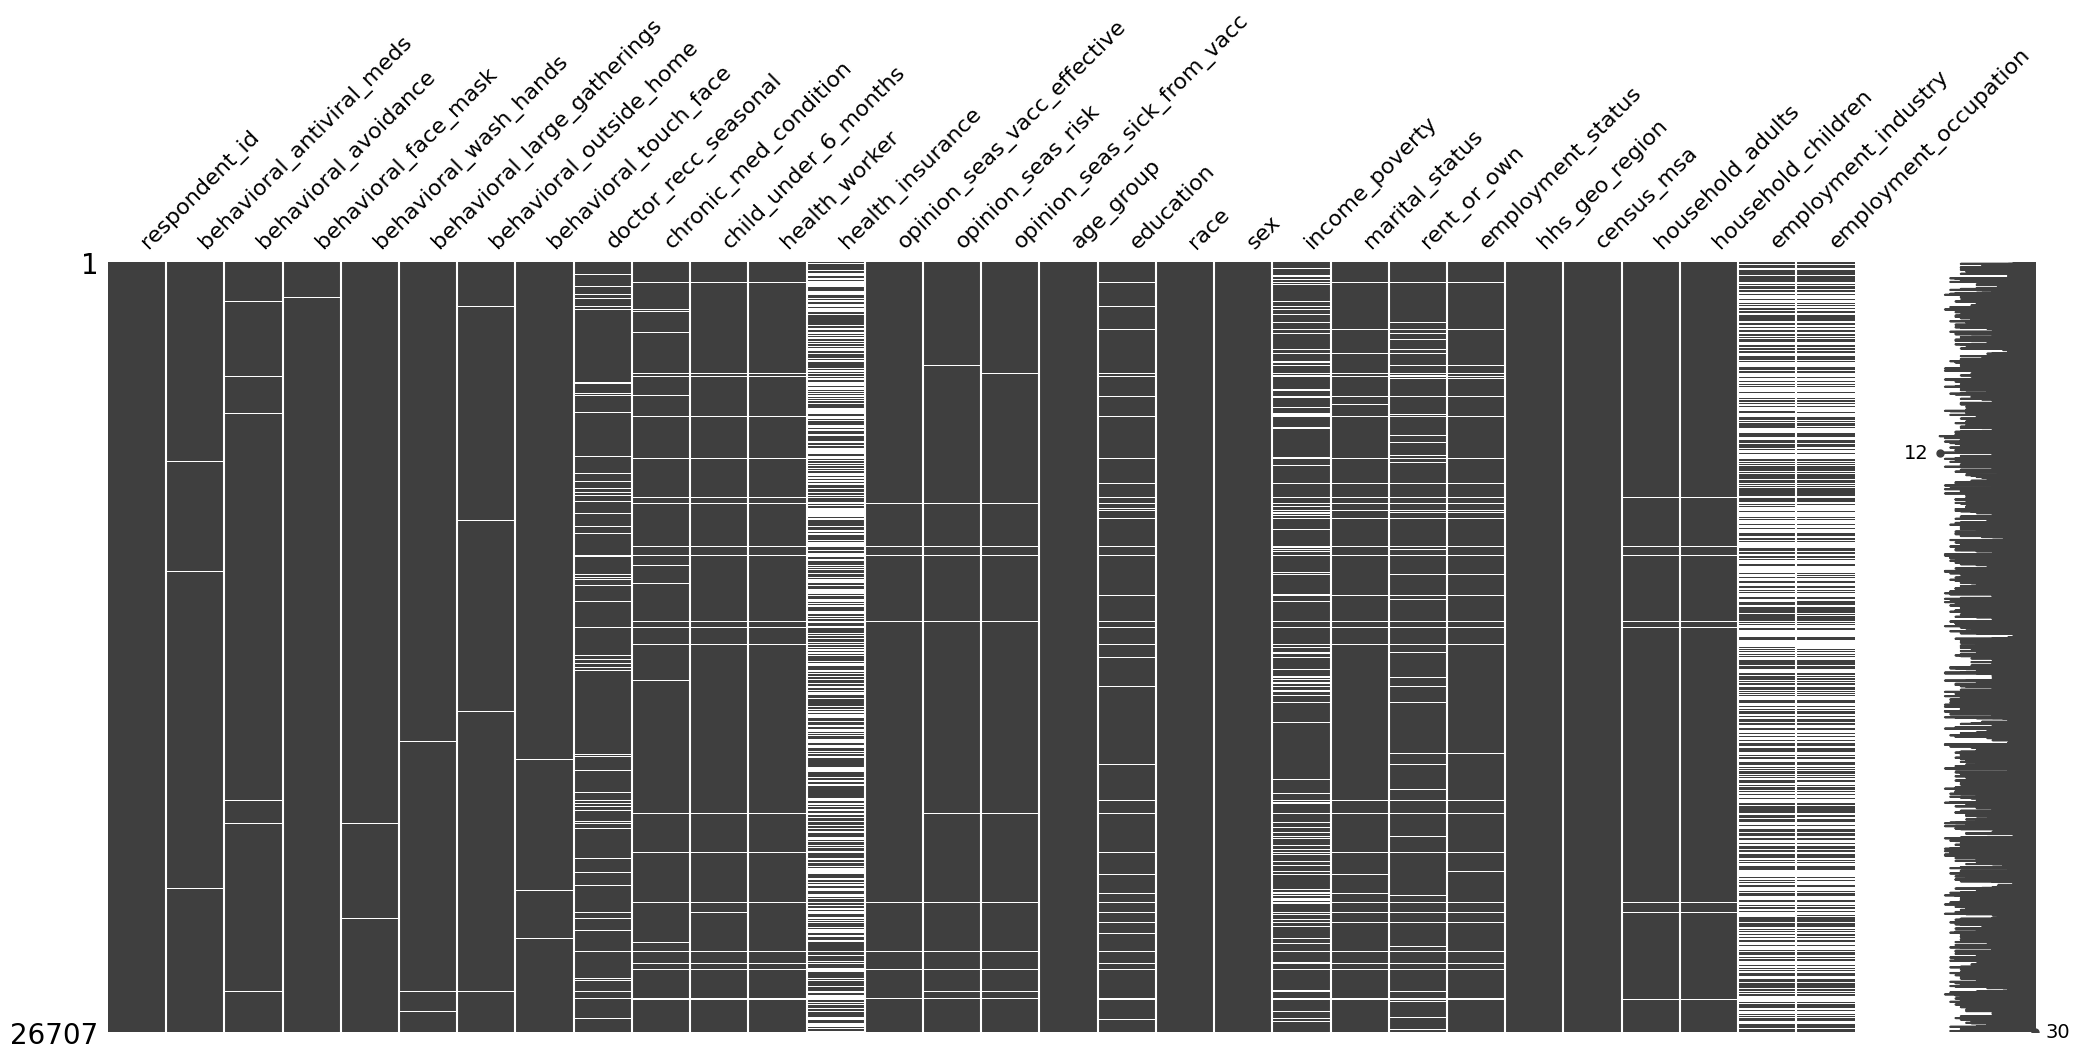

In [ ]:
# Visualize missing values
msno.matrix(train)

**Observations**
1. The employment_occupation, employment_industry, and health_insurance columns have the most missing values, with null values making up 50.4%, 49.9%, and 46.0% of the columns, respectively.

2. However, 10,231 of the null values for employment_occupation and employment_industry are basically "not applicable" rather than someone declining to answer because those are the respondents who answered "Not in Labor Force" for employment_status (see below).

3. See the same for an additional 1,453 observations representing all unemployed individuals. Again employment_occupation and employment_industry are better thought of as "not applicable" rather than someone declining to answer.

There are some clear patterns in missing values:

4. If respondent declined to answer whether their doctor recommended one type of vaccine, they usually declined to answer about whether their doctor recommended the other type.

5. Individuals also seemed to decline to answer whether they had a chronic medical condition, a child under 6 months, whether they were a health worker, all opinion questions, income, education, personal and home life questions.

6. These missing data patterns may indicate unique respondent categories. Treating missing values as a separate category can offer insights into non-provided features. Handling this significant portion of the dataset requires thoughtful data preprocessing and analysis.

**1. Employment Columns**
- For individuals marked as "Unemployed" in the `employment_status` column, the `employment_industry` is updated to "not employed".
- For individuals marked as "Not in Labor Force" in the `employment_status` column, the `employment_industry` is also updated to "not employed".
- For individuals marked as "Unemployed" in the `employment_status` column, the `employment_occupation` is updated to "not employed".
- For individuals marked as "Not in Labor Force" in the `employment_status` column, the `employment_occupation` is also updated to "not employed".  

By labeling these cases as `not employed`, the missing values are now replaced with meaningful information, which can be utilized for further analysis without introducing any biased assumptions.

In [ ]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Unemployed", "employment_industry"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Not in Labor Force", "employment_industry"] = "not employed"

In [ ]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Unemployed", "employment_occupation"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Not in Labor Force", "employment_occupation"] = "not employed"

**2. `health_insurance` Column**
- Missing values in the "health_insurance" column are filled with 0, assuming that those with missing values likely do not have health insurance coverage, possibly due to financial constraints associated with a higher poverty index.

In [ ]:
#Filling the missing values in health insurance with 0 assumptions is that there is correlation between the poverty index and health cover
train["health_insurance"].fillna(0, inplace=True)

In [ ]:
# check again for the missing values
missing=(train.isnull().sum()/len(train))*100

missing = missing.sort_values(ascending=False)

print("Missing values:")
print(missing)

Missing values:
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_occupation           6.687385
employment_industry             6.163178
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_hands           0.157262
behavioral_face_mask            0.071142
census_msa                      0.000000


**Calculating the frequency percentage of each unique value**
- To help identify columns with a large number of unique values that might require special treatment during data preprocessing or feature engineering.

In [ ]:
total_observations = len(train)

for col in train.columns:
    print(f"Column: {col}")
    freq_percentage = train[col].value_counts(dropna=False) / total_observations * 100
    print(freq_percentage)
    print()

Column: respondent_id
0        0.003744
17736    0.003744
17812    0.003744
17811    0.003744
17810    0.003744
           ...   
8898     0.003744
8897     0.003744
8896     0.003744
8895     0.003744
26706    0.003744
Name: respondent_id, Length: 26707, dtype: float64

Column: behavioral_antiviral_meds
0.0    94.862770
1.0     4.871382
NaN     0.265848
Name: behavioral_antiviral_meds, dtype: float64

Column: behavioral_avoidance
1.0    71.996106
0.0    27.225072
NaN     0.778822
Name: behavioral_avoidance, dtype: float64

Column: behavioral_face_mask
0.0    93.035534
1.0     6.893324
NaN     0.071142
Name: behavioral_face_mask, dtype: float64

Column: behavioral_wash_hands
1.0    82.431572
0.0    17.411166
NaN     0.157262
Name: behavioral_wash_hands, dtype: float64

Column: behavioral_large_gatherings
0.0    63.927060
1.0    35.747182
NaN     0.325757
Name: behavioral_large_gatherings, dtype: float64

Column: behavioral_outside_home
0.0    66.065077
1.0    33.627888
NaN     0.307036

- Since the remaining missing values are categorical variables, we will fill using `Unknown` for the `education`, `marital_status`, `rent_or_own`, and `income_poverty` columns.
- This gives a clear label for the missing values and allows the values to be treated as a distinct category during data analysis and modeling.

In [ ]:
# filling with unkwown for categorical isna values

# education
train["education"].fillna("Unknown", inplace=True)

# marital status
train["marital_status"].fillna("Unknown", inplace=True)

# rent
train["rent_or_own"].fillna("Unknown", inplace=True)

# income/poverty
train["income_poverty"].fillna("Unknown", inplace=True)

**Filling with modal class for the missing values since the counts is insignificant**

In [ ]:
# fill all the categorical variable with the modal class
train_filled = train.fillna(train.mode().iloc[0])
missing2=train_filled.isnull().sum() # confirm if the data has been filled.

missing2

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
dtype: int

# **Exploratory Data Analysis**

### **The Target Features**

In [ ]:
# Target variables dataset exploratory
target.head()

,respondent_id,seasonal_vaccine
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


<Axes: xlabel='seasonal_vaccine', ylabel='count'>

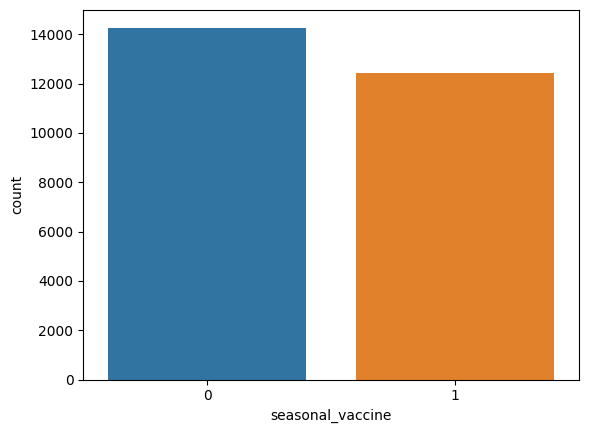

In [ ]:
# checking the distribution of the target variable

sns.countplot(data=target, x="seasonal_vaccine")

**Observations**
- The number of respondents who had taken the seasonal flu vaccine is lower compared to those who had not taken it.

In [ ]:
frequency = target["seasonal_vaccine"].value_counts()
frequency

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

**Class balance**:

The counts of the two classes are not significantly different and are relatively close, we can consider dataset to be reasonably balanced.

### **More Preparation for Analysis**
- First, a new DataFrame, `train_target`, is created from a merge of `train_filled` and `target` DataFrames to create a single DataFrame.
- The new DataFrame will contain all the information needed for univariate and multivariate analysis and for building machine learning models.

In [ ]:
#Merge the two datasets
train_target = train_filled.merge(target, on="respondent_id")

- Next, the `respondent_id` column is made the the index of the DataFrame.

In [ ]:
#make respondent id the index column
train_target.set_index("respondent_id", inplace=True)
train_target

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,not employed,not employed,0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,not employed,not employed,1


## **Univariate Analysis**

### **EDA Socioeconomic Features**

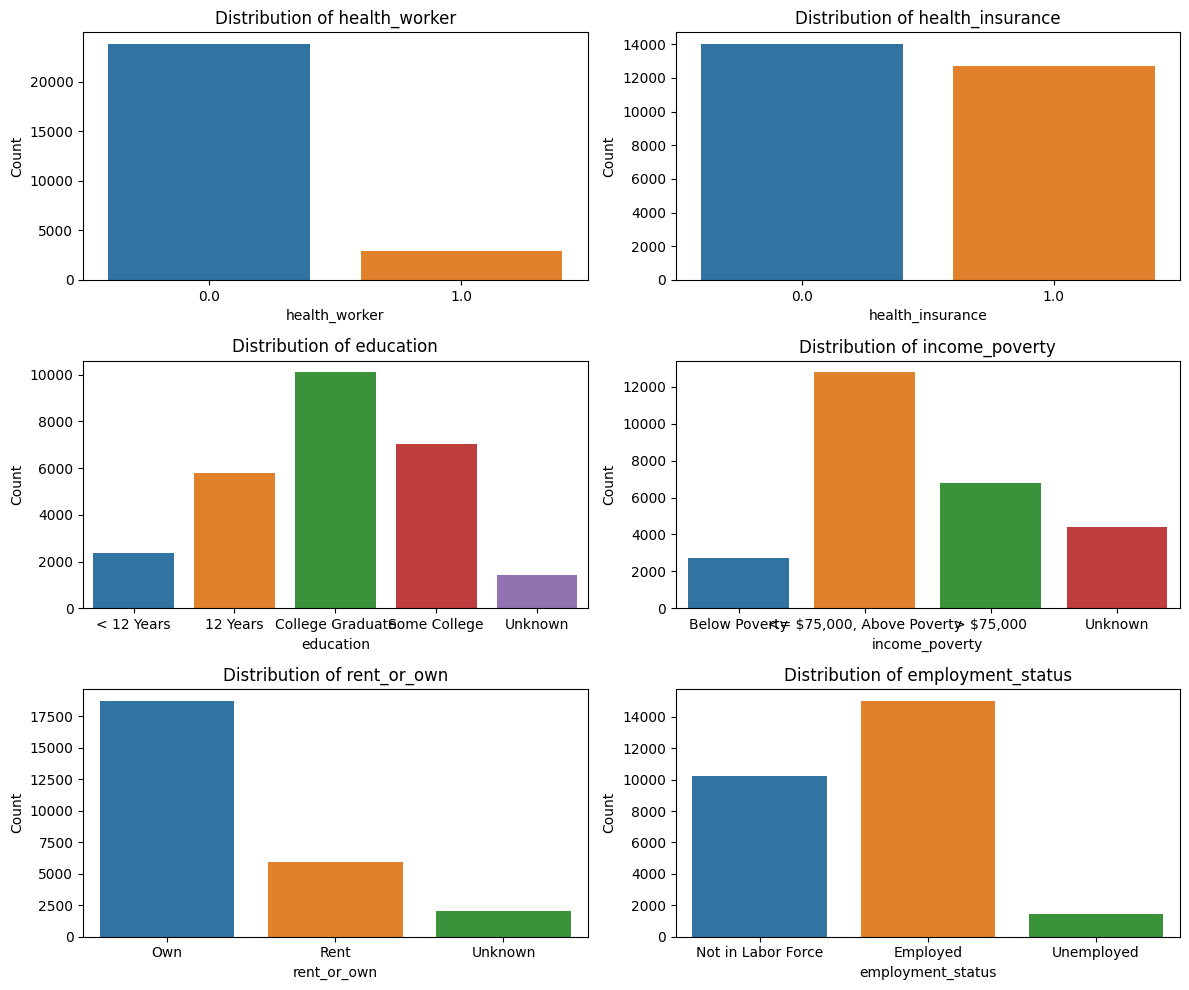

In [ ]:
# List of columns to create countplots for
columns_to_plot = ["health_worker", "health_insurance", "education",
                   "income_poverty", "rent_or_own", "employment_status"]

# Calculate the number of rows and columns for subplots dynamically
num_plots = len(columns_to_plot)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create individual countplots
for i, column in enumerate(columns_to_plot):
    if i >= num_rows * num_cols:  # Check if index exceeds total number of subplots
        fig.delaxes(axes[i])
    else:
        if column == "age_group":
            sns.countplot(data=train_target, x=column, order=train_target["age_group"].value_counts().index, ax=axes[i])
        else:
            sns.countplot(data=train_target, x=column, ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Count")
        axes[i].set_title(f"Distribution of {column}")

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Save the image
plt.savefig("socio_econ.png")

# Show the subplots
plt.show()

**Observations**  
- The respondents were mostly made up of individuals in other professions other than health workers.
- The number of people with health insurance was almost similar to those who had no health insurance. However, those without were the majority. This is partly due to the assumption made earlier that the missing values were for those without insurance.
- A normal distribution in the education feature was observed with those who had a college education making up the majority.
- Most respondents had an annual household income of less than $75,000. A fair amount of respondents failed to disclose their income and were categorized as "Unknown".
- Majority of the respondents own the houses they live in.
- Majority were also employed at the time of the interview.

###**EDA for Behavioral Features**

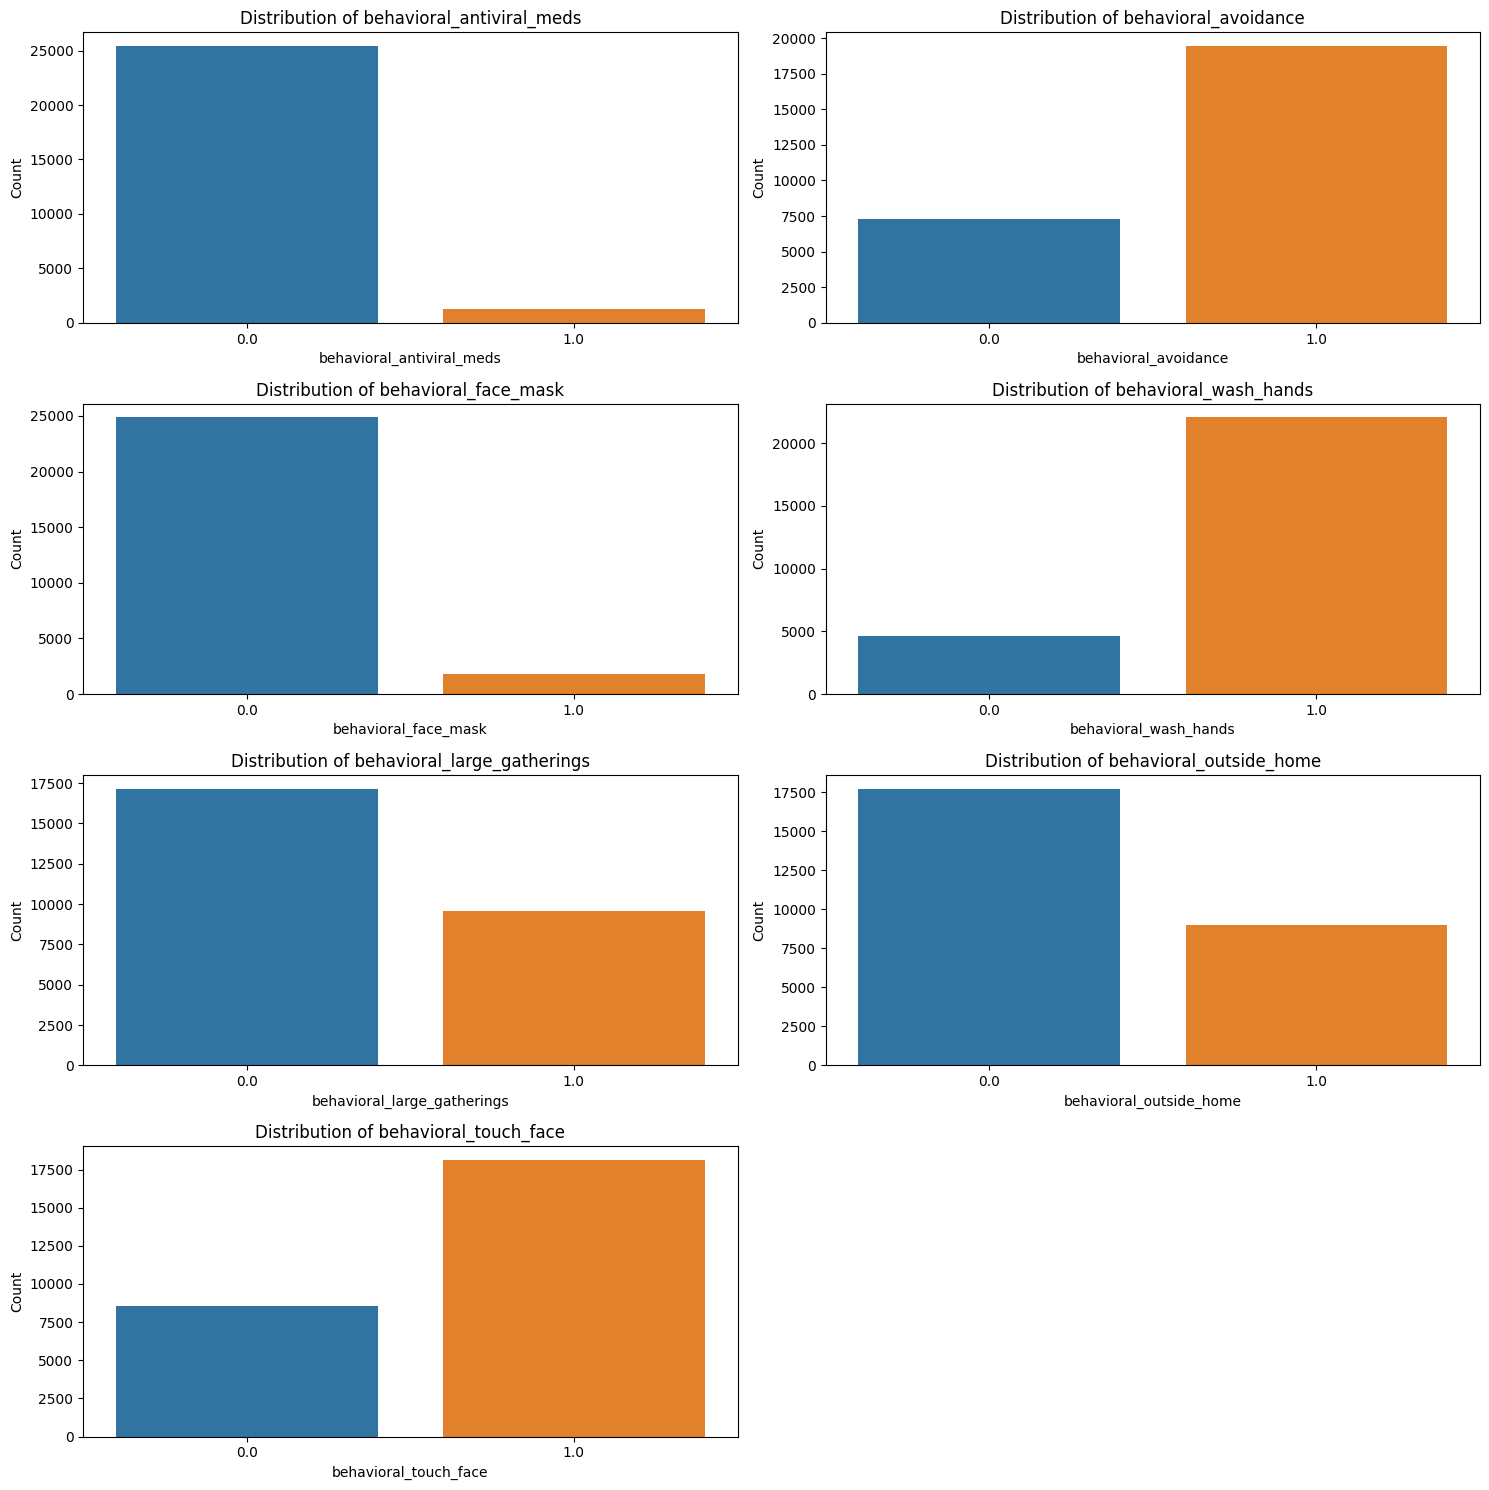

In [ ]:
#EDA for behavioral factors
# List of columns to create countplots for
columns_to_plot = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask", "behavioral_wash_hands",
                   "behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face"]

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create individual countplots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=train_target, x=column, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {column}")

# Adjust the layout and spacing between subplots
fig.delaxes(axes[-1])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# save image
plt.savefig("behavior.png")

# Show the subplots
plt.show()


**Observations**  
- Majority of the respondents appeared not to have taken any antiviral medication. The response might be subjective and would require further investigation on how the question was asked.
- Most of the respondents had also avoided close contact with people who had flu-like symptoms.Most were also in the practice of washing hands and using hand sanitizer.
- Majority had also not bought facemask. Similarly, most were avoiding touching their face, nose or mouth.
-  There was no social-distancing among the respondents.

### **EDA for Demographic Features**

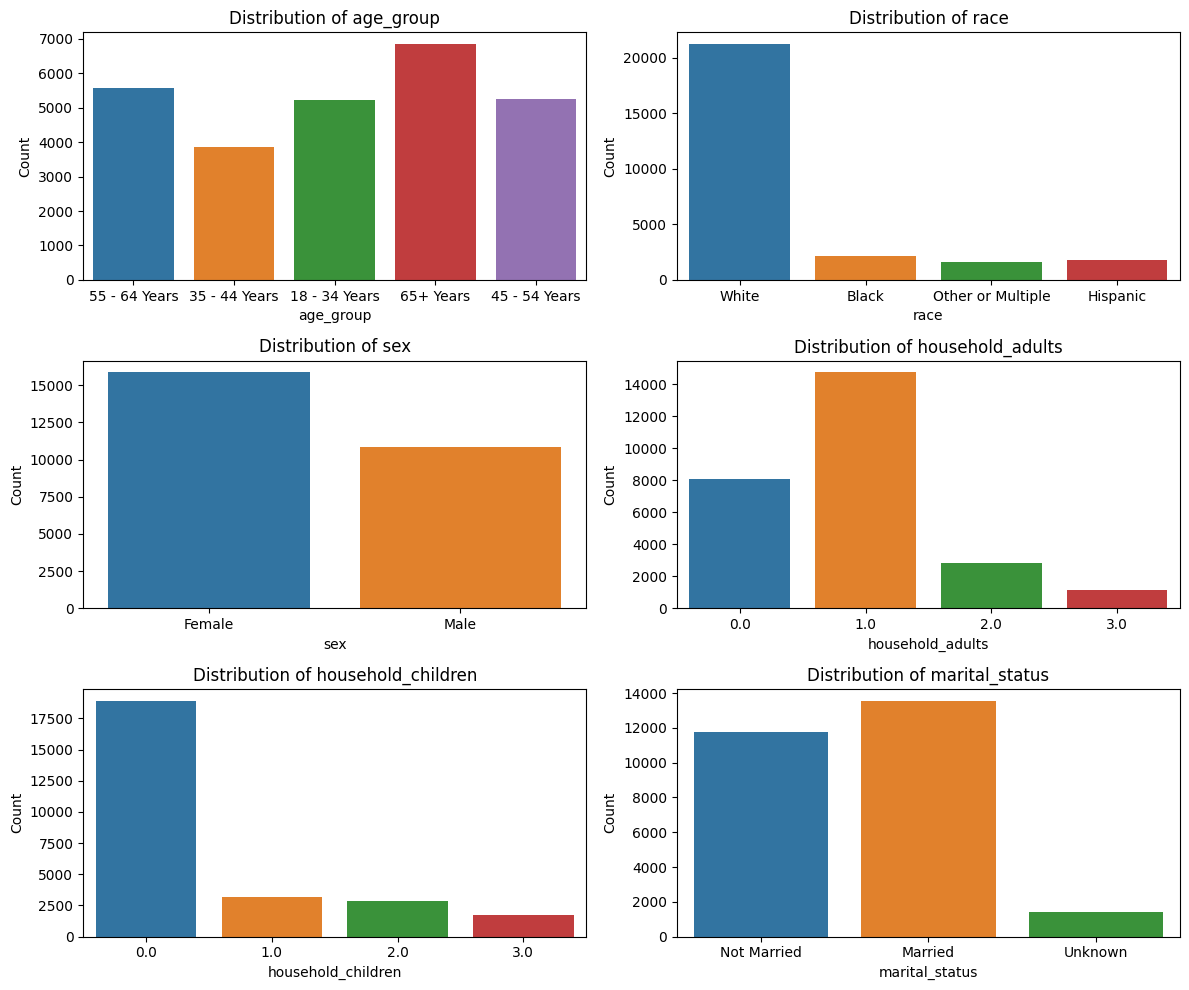

In [ ]:
# List of demographic columns to create countplots for
demographic_columns = ["age_group", "race", "sex", "household_adults", "household_children", "marital_status"]

# Calculate the number of rows and columns for subplots dynamically
num_plots = len(demographic_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create individual countplots
for i, column in enumerate(demographic_columns):
    if i >= num_rows * num_cols:  # Check if index exceeds total number of subplots
        fig.delaxes(axes[i])
    else:
        sns.countplot(data=train_target, x=column, ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Count")
        axes[i].set_title(f"Distribution of {column}")

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Save the image
plt.savefig('demographic.png')

# Show the subplots
plt.show()

**Observations**
- The respondents" age groups were normally distributed with majority being 65 years and older. This is synonymous with developed countries. Most were also female and white.
- Majority of the households had at least two adults with no child(ren) at the time of the interview.
- The number of married and unmarried respondents was almost similar.
- Majority also lived outside the Metropolitan Statitistical Area (MSA) as defined by the US Census.

### **EDA for Knowledge, Attitudes and Beliefs Towards Vaccines**

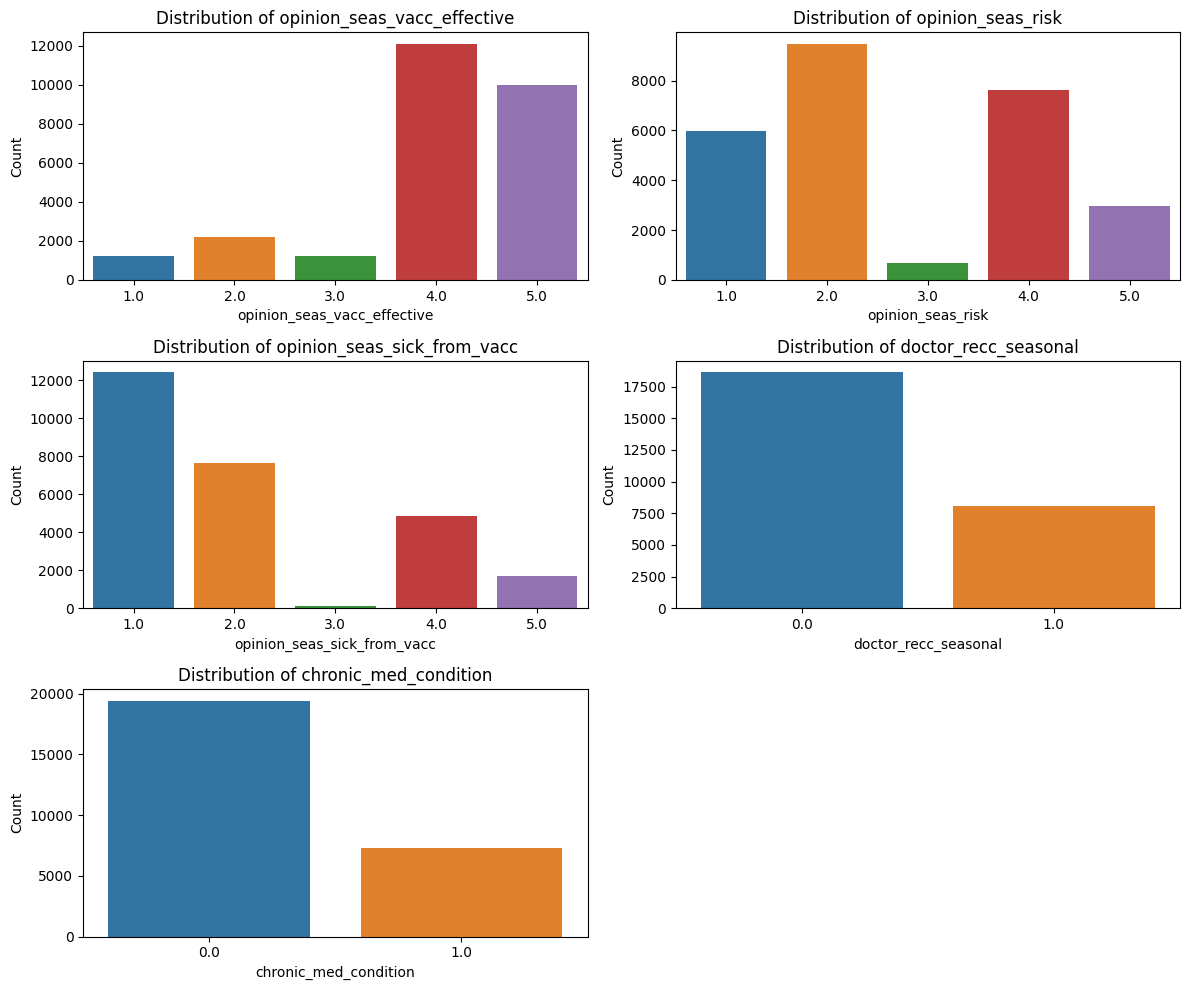

In [ ]:
# List of columns to create countplots for
columns_to_plot = ["opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
                   "doctor_recc_seasonal","chronic_med_condition"]

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create individual countplots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=train_target, x=column, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {column}")

# Adjust the layout and spacing between subplots
fig.delaxes(axes[-1])


# Adjust the layout and spacing between subplots
plt.tight_layout()

# save image
plt.savefig("opinions.png")

# Show the subplots
plt.show()

**Observations**
- Majority believed that seasonal vaccines were effective and they were not worried about falling sick from taking the vaccine.
- However, a large number believed that the risk of contracting the flu without a vaccine was low.
- Majority of the respondents had not received any recommendations for the vaccine from their doctors.
- Most respondents did not have a chronic medical condition.

## **Bivariate Analysis**

### **Socieconomic Features vs Seasonal Vaccine Uptake**

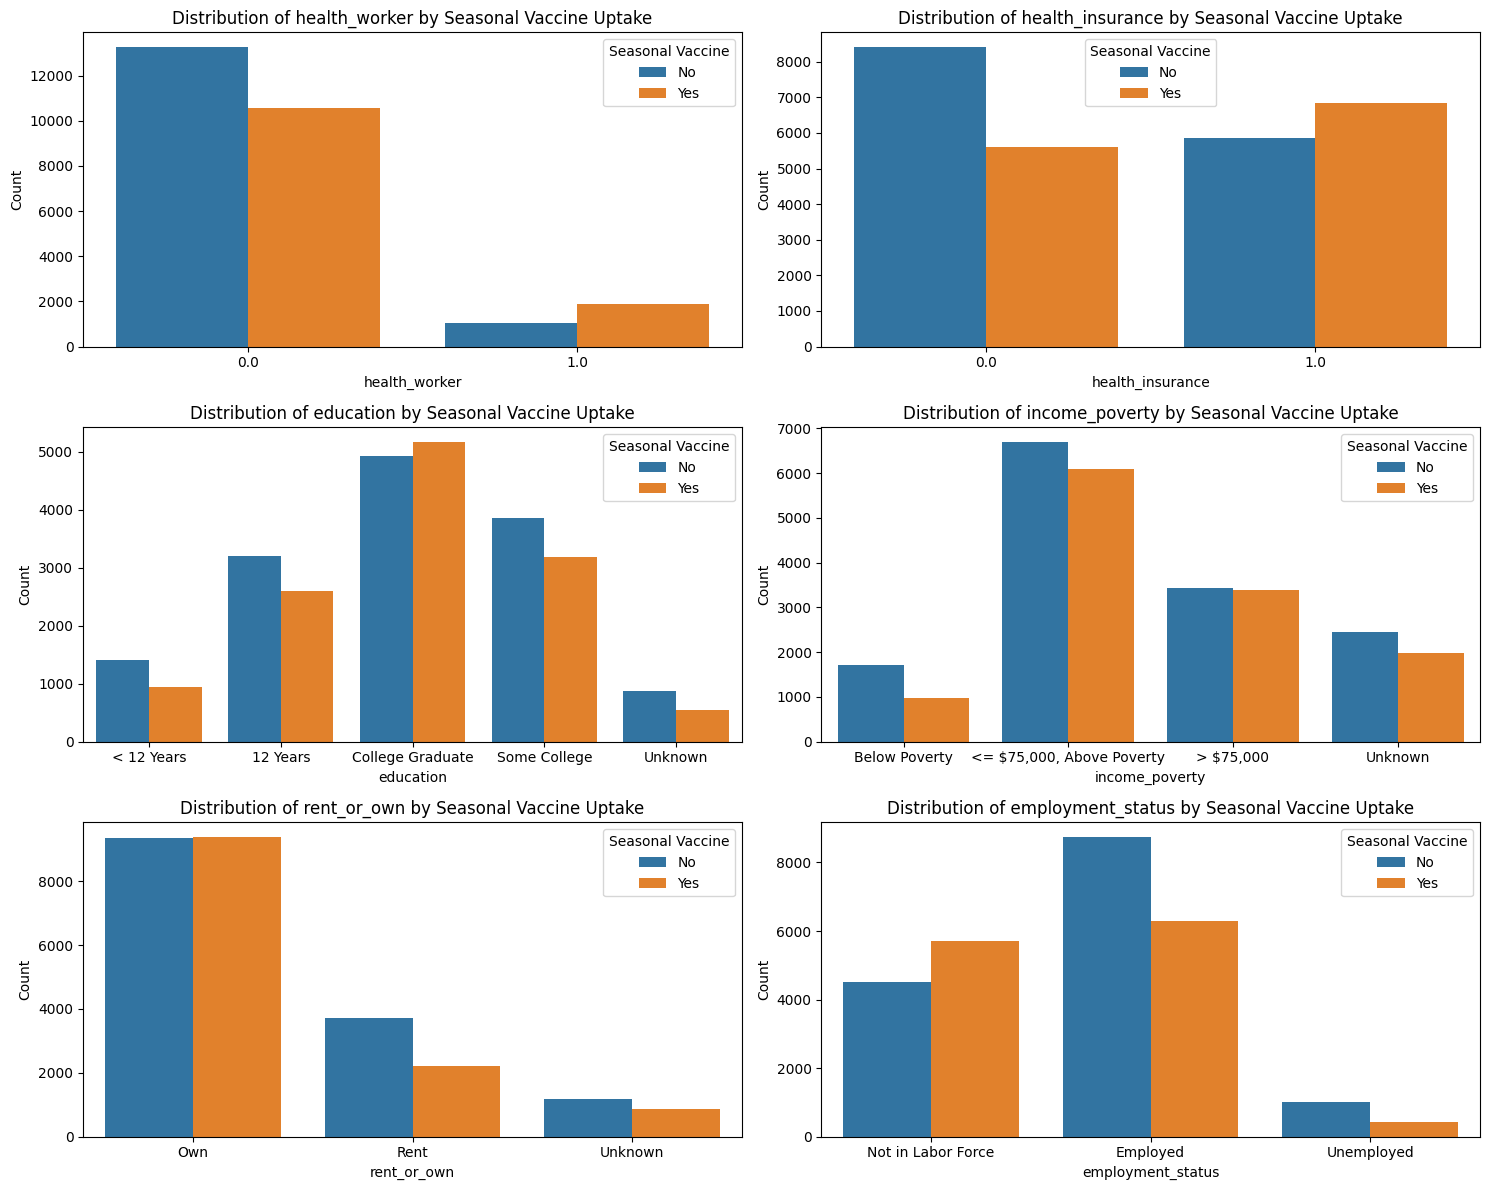

In [ ]:
# columns to plot
y = ["health_worker", "health_insurance", "education",
     "income_poverty", "rent_or_own", "employment_status"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

for i, variable in enumerate(y):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax)
    ax.set_title(f"Distribution of {variable} by Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

plt.tight_layout()

# save image
plt.savefig("socio-econ_binary.png")

# Show the subplots
plt.show()


**Observations**

- Majority of the health workers received vaccines as opposed to non-health workers where majority did not receive.
- Respondents with health insurance are likely to receive vaccines as compared to those without the insurance.
- Respondents with college level of education are   more receptive of the vaccine.
- The poorer respondents in terms of annual income per household were less likely to receive the vaccine.
- More of those who lived in their own houses received the vaccine compared to those paying rent/with unknown housing conditions.
- The employed respondents were more likely to receive the vaccine compared to those not in any employment.

### **Behavioral Features vs Seasonal Vaccine Uptake**

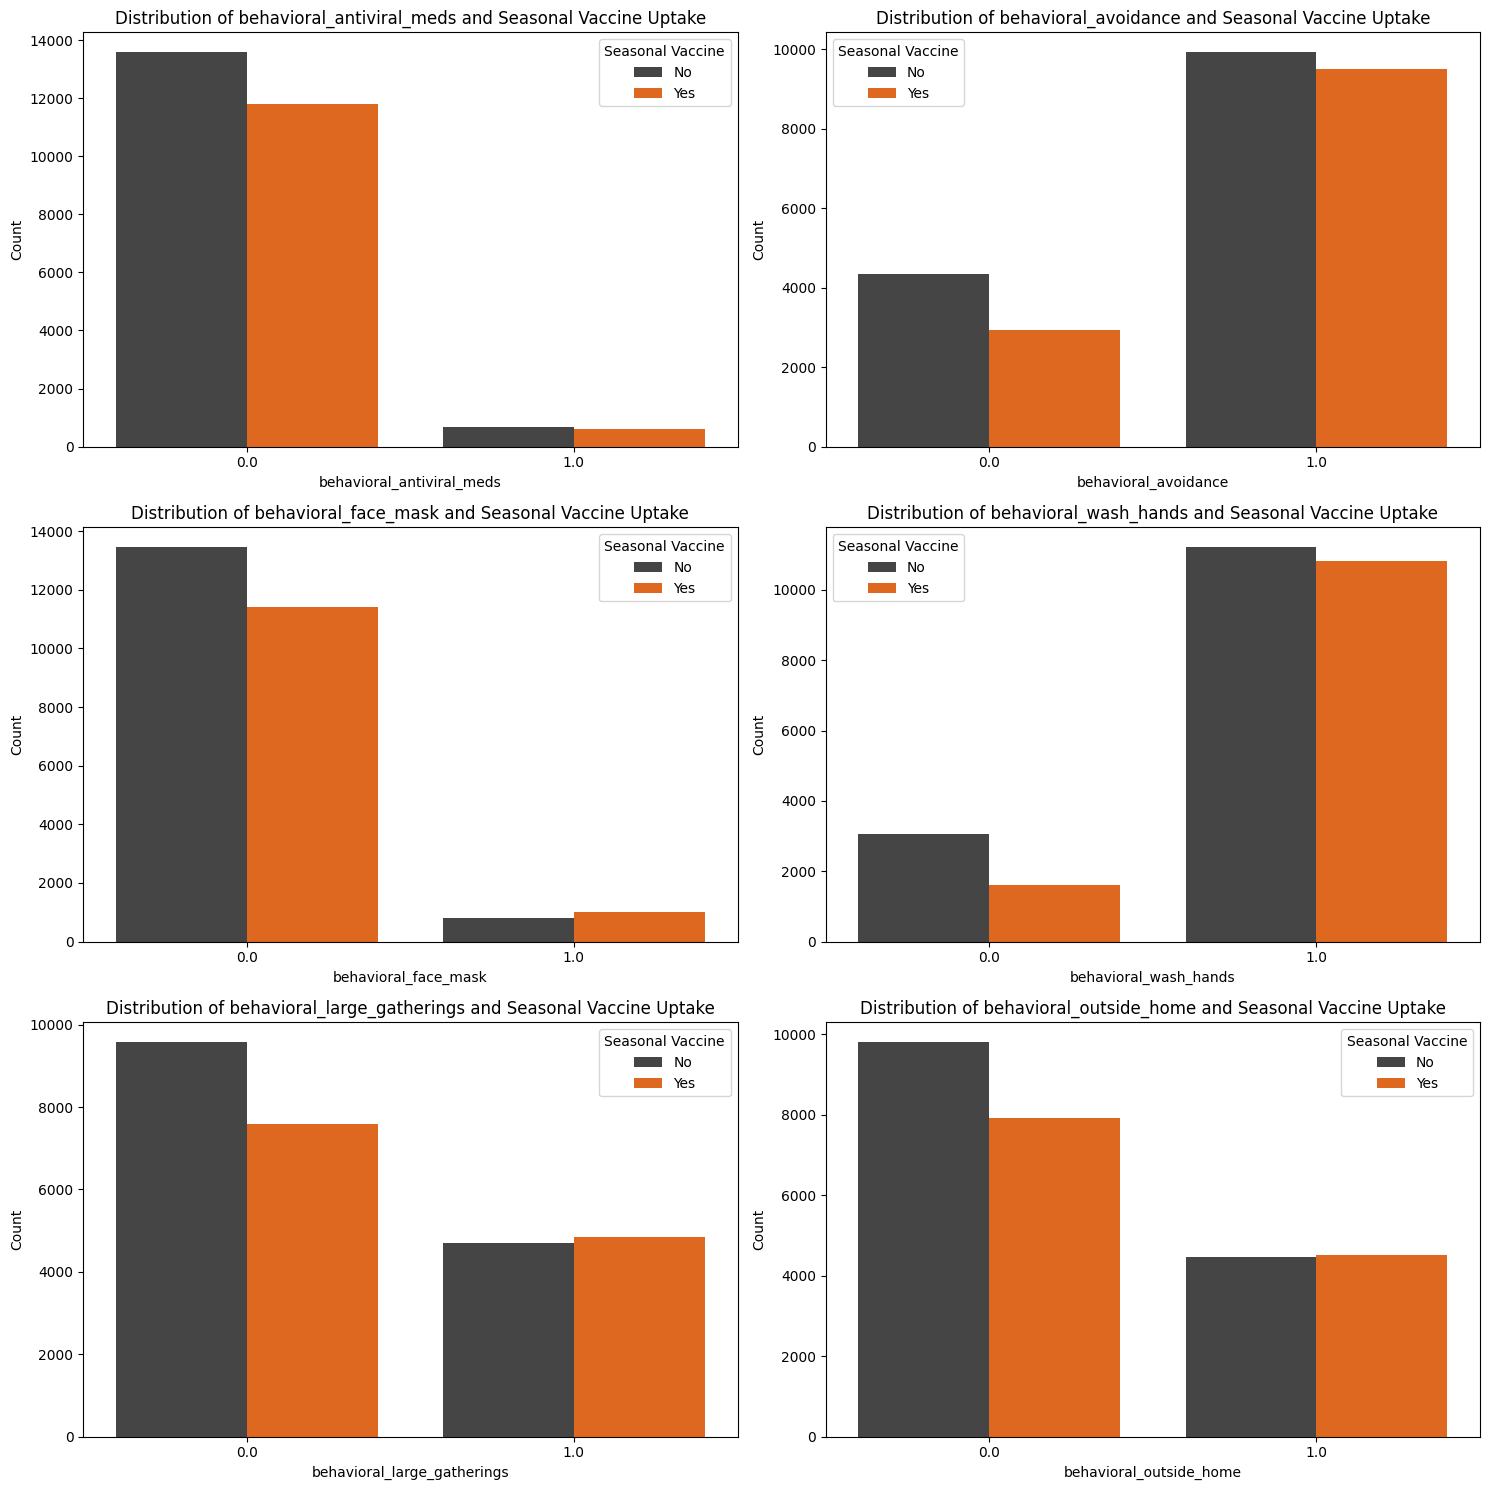

In [ ]:
# columns to plot
y = ["behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask",
     "behavioral_wash_hands", "behavioral_large_gatherings", "behavioral_outside_home"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Define custom color palette
custom_palette = ["#454545", "#FF6000"]

for i, variable in enumerate(y):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax, palette=custom_palette)
    ax.set_title(f"Distribution of {variable} and Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

plt.tight_layout()
plt.savefig("behavioral_binary.png")
plt.show()

**Observations**
- Generally, behavioral factors did not have much influence on whether the respondents took the vaccines.
- Whether the respondent was on antiviral medication, avoided contact with people showing flu symptoms even outside the home or washed hands/used santizers often and vice versa, the general outome was that less people ad received the vaccine.

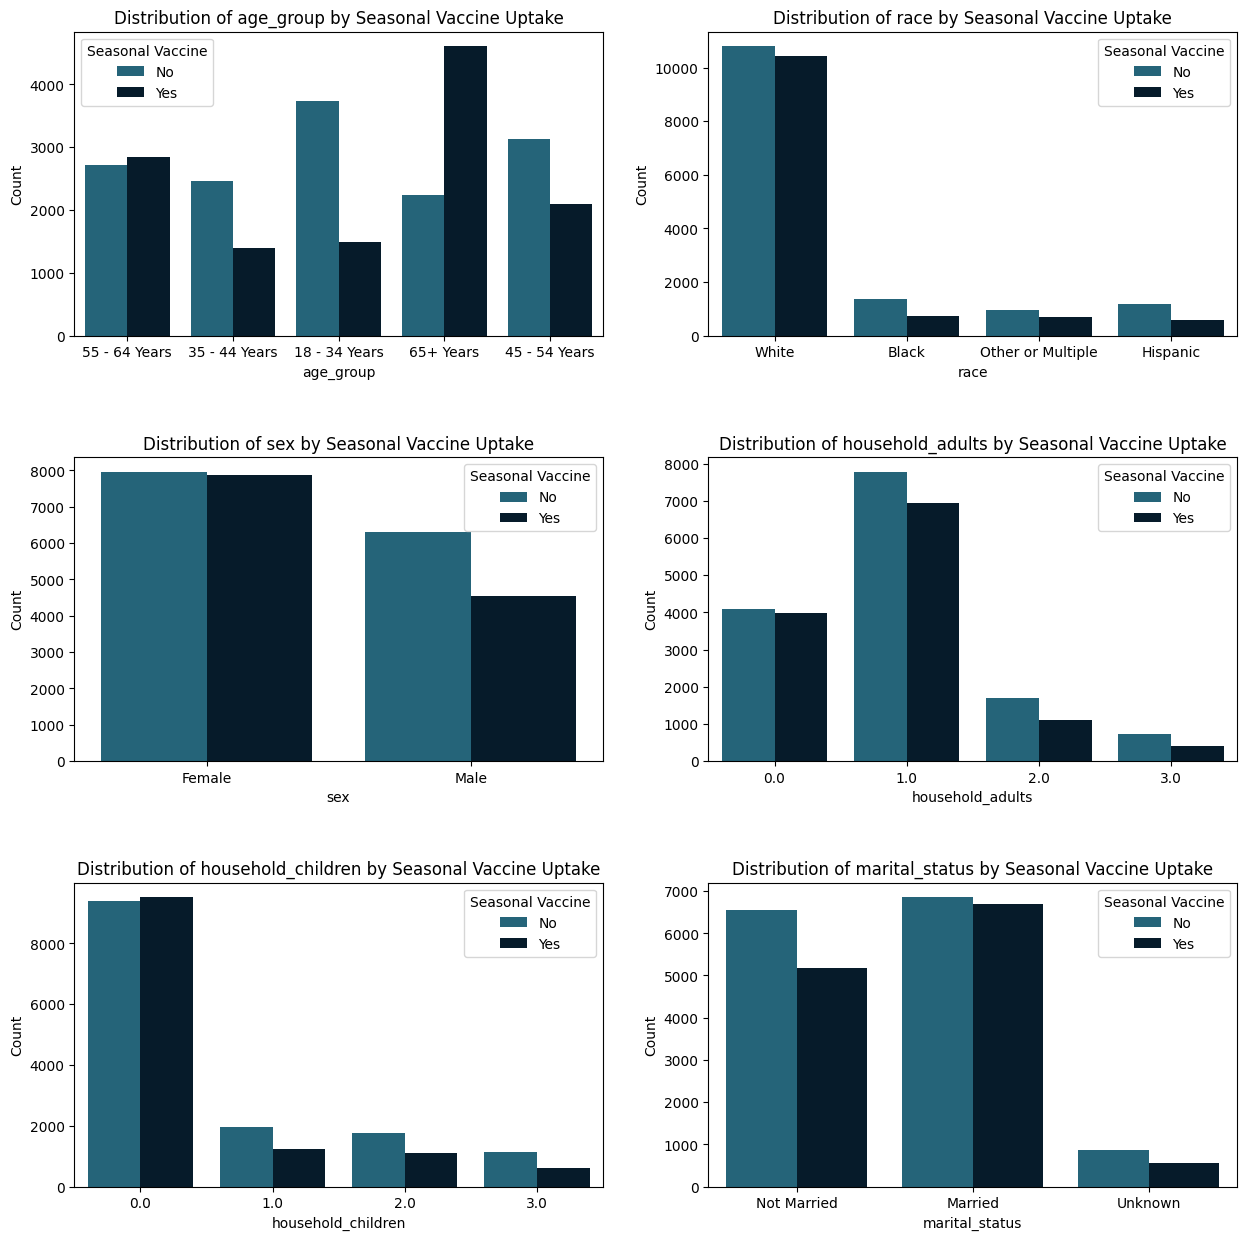

In [ ]:
# columns to plot
y = ["age_group", "race", "sex", "household_adults", "household_children", "marital_status"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
custom_palette = ["#176B87", "#001C30"]
for i, variable in enumerate(y):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax,palette=custom_palette)
    ax.set_title(f"Distribution of {variable} by Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.savefig("demographic_binary.png")
plt.show()



**Observations**
- The number of older people above 65 years of age were more likely to receive the vaccine compared to the younger population.
- More female and married respondents as well as people of White descent received the vaccine compared to others in their respective categories.
- Households with one adult and no children received the vaccine in more numbers than other respondents in the respective categories.

### **Knowledge, Attitudes and Beliefs Towards Vaccines vs Seasonal Vaccine Uptake**

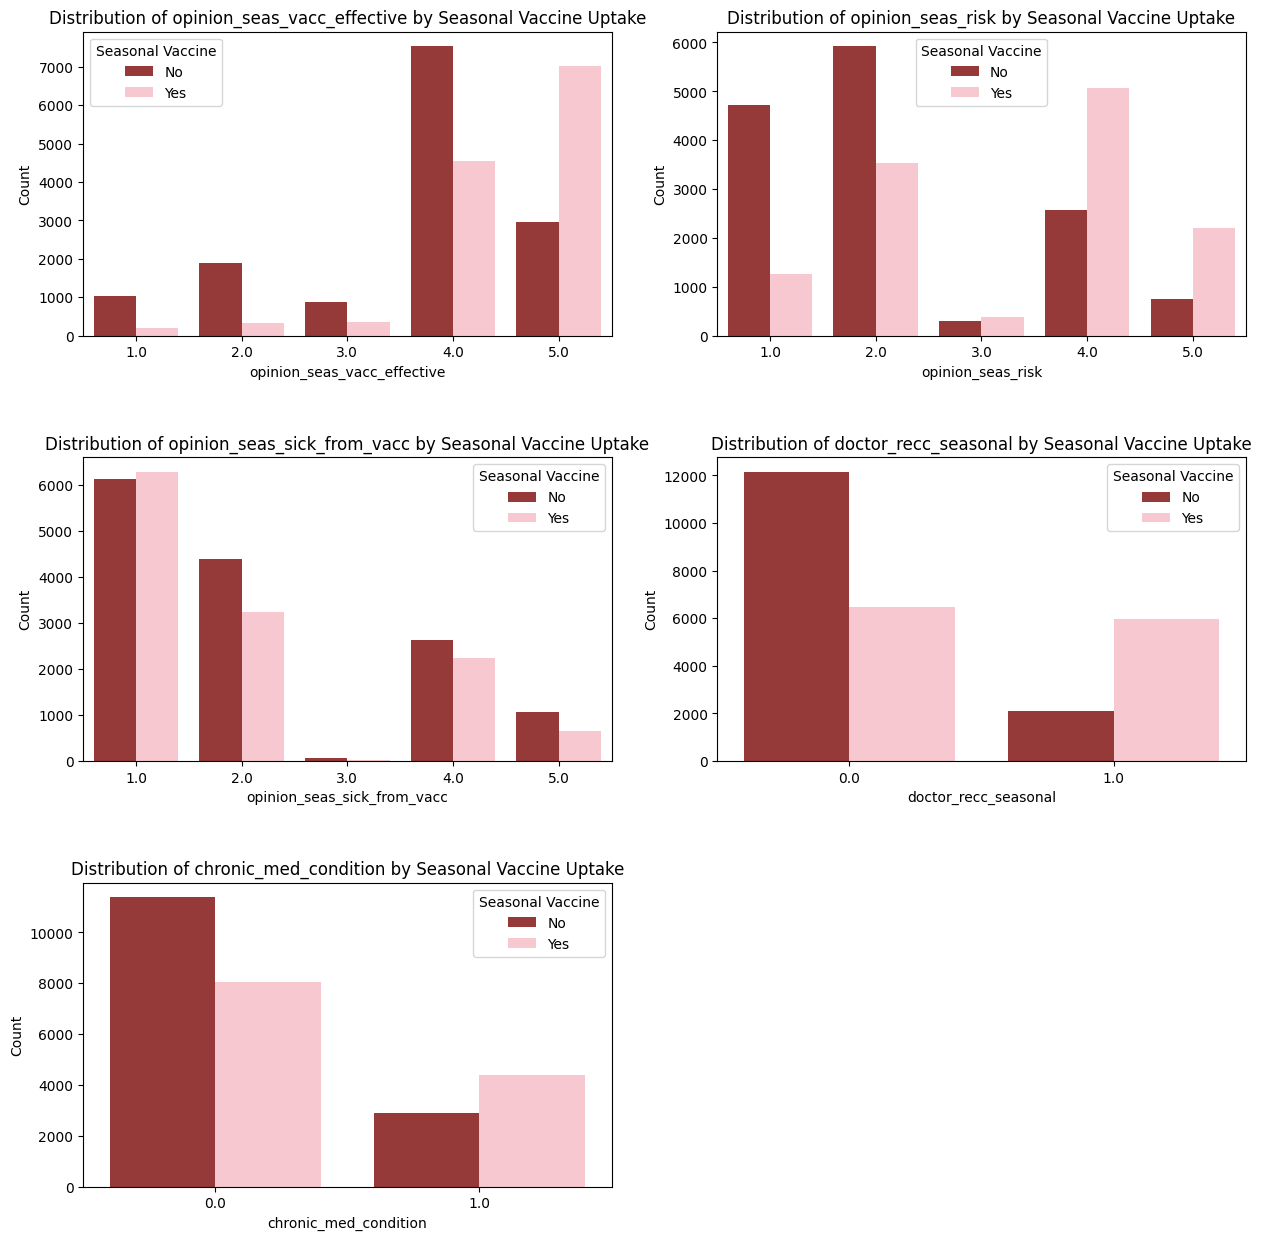

In [ ]:
# columns to plot
y = ["opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc",
     "doctor_recc_seasonal", "chronic_med_condition"]

num_plots = len(y)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))
custom_palette = ["brown", "pink"]

for i, variable in enumerate(y):
    if i >= num_plots:
        break

    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]
    sns.countplot(x=variable, hue="seasonal_vaccine", data=train_target, ax=ax, palette=custom_palette)
    ax.set_title(f"Distribution of {variable} by Seasonal Vaccine Uptake")
    ax.set_xlabel(variable)
    ax.set_ylabel("Count")
    ax.legend(title="Seasonal Vaccine", labels=["No", "Yes"])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Remove any extra blank subplot
if num_plots < num_cols * num_rows:
    fig.delaxes(axes.flatten()[num_plots])

plt.savefig("opinion_binary.png")
plt.show()

**Observations**
- The majority of respondents who received the vaccine hold the opinion that it is effective.
- A general observation is that the lower the opinion towards the vaccine factor, the lower the vaccine uptake. A respondent was less likely to receive the vaccine if they:
   - did not believe that there is a risk of getting sick with seasonal flu without vaccine;
   - was not worried of getting sick from taking seasonal flu vaccine;
   - did not get a doctor's recommendation to take the vaccine, and;
   - had no chronic medical condition.

# **Feature Engineering**

## **Data Encoding**
First, the data types are displayed once again to determine the affected features.

In [ ]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26707 non-null  float64
 1   behavioral_avoidance         26707 non-null  float64
 2   behavioral_face_mask         26707 non-null  float64
 3   behavioral_wash_hands        26707 non-null  float64
 4   behavioral_large_gatherings  26707 non-null  float64
 5   behavioral_outside_home      26707 non-null  float64
 6   behavioral_touch_face        26707 non-null  float64
 7   doctor_recc_seasonal         26707 non-null  float64
 8   chronic_med_condition        26707 non-null  float64
 9   child_under_6_months         26707 non-null  float64
 10  health_worker                26707 non-null  float64
 11  health_insurance             26707 non-null  float64
 12  opinion_seas_vacc_effective  26707 non-null  float64
 13  opinion_seas_ris

### **One-Hot Encoding**
**Columns** - "age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status", "census_msa", and "income_poverty."


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoded_df = train_target[["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                           "census_msa", "income_poverty"]]
#using one-encoding to create dummy column
ohe = OneHotEncoder()
data_enc1= ohe.fit_transform(encoded_df)

#converting the finding into dataframe
data_enc1.todense()

#getting feature names
ohe.get_feature_names_out()

# geting feature names in a dataframe
data_encoded = pd.DataFrame(data_enc1.todense(), columns=ohe.get_feature_names_out())
data_encoded.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,...,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,income_poverty_Unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
train_target_copy = train_target.copy()
train_target_copy.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [ ]:
columns_to_drop = ["age_group", "education", "race", "sex", "marital_status", "rent_or_own", "employment_status",
                   "census_msa", "income_poverty", "hhs_geo_region", "employment_industry", "employment_occupation"]
train_target_copy.drop(columns_to_drop, axis=1, inplace=True)
train_target_copy.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0,0.0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,1.0,0.0,0


- The merged `train_target_float` DataFrame has a combination of numerical columns from `train_target_copy` and the **one-hot encoded binary columns** from `data_encoded`.
- This merged DataFrame has all the features are represented in numerical format.

In [ ]:
train_target_float = pd.merge(train_target_copy, data_encoded, left_index=True, right_index=True)
train_target_float.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   behavioral_antiviral_meds                 26707 non-null  float64
 1   behavioral_avoidance                      26707 non-null  float64
 2   behavioral_face_mask                      26707 non-null  float64
 3   behavioral_wash_hands                     26707 non-null  float64
 4   behavioral_large_gatherings               26707 non-null  float64
 5   behavioral_outside_home                   26707 non-null  float64
 6   behavioral_touch_face                     26707 non-null  float64
 7   doctor_recc_seasonal                      26707 non-null  float64
 8   chronic_med_condition                     26707 non-null  float64
 9   child_under_6_months                      26707 non-null  float64
 10  health_worker                     

# **Modelling**

## **Baseline model**

### **Baseline Metrics**

Before conducting any modeling on the data, a "dummy" model that always predicts the positive class is first used.

- "negative" is defined as a 0 (not received vaccine ) and "positive" as a 1 (received thye vaccine).

- Focus is on the test data, since this is will be used to evaluate the actual model as well.

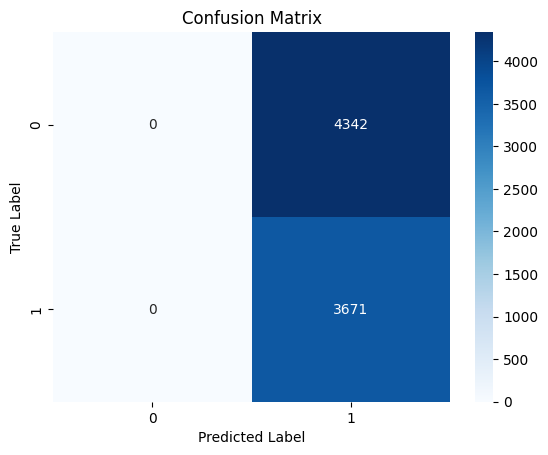

In [ ]:
from sklearn.linear_model import LogisticRegression

# split data into train and test, claze size=0.3
X = train_target_float.drop(columns=["seasonal_vaccine"], axis=1)
y = train_target_float["seasonal_vaccine"]

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the dummy classifier
dummy_classifier = DummyClassifier(strategy="constant", constant=1)
dummy_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dummy_classifier.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.savefig("baseline_cm.png")
plt.show()

In [ ]:
# Evaluation of the baseline model

#Accuracy=TP+TN/TP+TN+FP+FN
TP=3671
TN=0
FP=4342
FN=0
baseline_accuracy=(TP+TN)/(TP+FP+TN+FN)
print("baseline_accuracy: " ,baseline_accuracy)

#precision TP/TP+FP
baseline_precision=(TP/(TP+FP))
print("baseline_precision: " ,baseline_precision)

baseline_recall=(TP/(TP+FN))
print("baseline_recall: " ,baseline_recall)

baseline_F1score=(2*baseline_precision* baseline_recall)/(baseline_precision+baseline_recall)
print("baseline_F1score: " ,baseline_F1score)

baseline_accuracy:  0.4581305378759516
baseline_precision:  0.4581305378759516
baseline_recall:  1.0
baseline_F1score:  0.6283806915439919


**Baseline Model Observations**
1. **Baseline Accuracy** is approximately 45.81%, it means that the dummy classifier, correctly predicts around 45.81% of instances in the test data.

2. **Baseline Precision** is  also 45.81%. It is equal to the accuracy since the dummy classifier always predicts the positive class.

3. **Baseline Recall** is 100%. Since the dummy classifier always predicts the positive class, it correctly identifies all the actual positive instances.

4. **Baseline F1-score** is approximately 62.84%. A higher F1-score would indicate a better balance between precision and recall.

These metrics will be used to reference the performance of subsequent models, hoping that they will outperform the baseline model.

## **1. Logistic Regression**

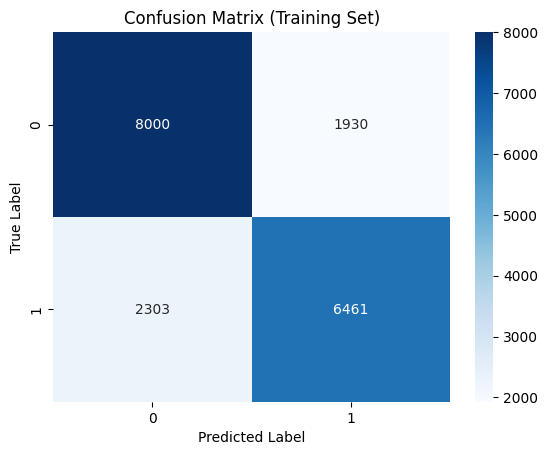

In [ ]:
# fit the model in logistic regression

# Instantiate the model
model1 = LogisticRegression(random_state=42)

# Fit the model on the scaled data
model1.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = model1.predict(X_train_scaled)

# Create confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Set)")

plt.savefig("logistic_cm.png")

plt.show()

In [ ]:
# cross validate the model using 3 kfolds

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model1, X_train_scaled, y_train, cv=3)
print("Cross-Validation Scores:", cv_scores)

average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score * 100) # in percentage

Cross-Validation Scores: [0.76813222 0.77210721 0.77820575]
Average Cross-Validation Score: 77.28150573893545


- The scores indicate that the model is approximately 77% accurate in its performance.

In [ ]:
#evaluation of model

# Replace None with appropriate code
y_pred = model1.predict(X_test_scaled)
model1_accuracy = accuracy_score(y_test, y_pred)
model1_recall = recall_score(y_test, y_pred)
model1_precision = precision_score(y_test, y_pred)
model1_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model 1: {model1_accuracy:1.3f}
Recall Fitted Model 1: {model1_recall:1.3f}
Precision Fitted Model 1: {model1_precision:1.3f}
F1 Score Fitted Model 1: {model1_f1:1.3f}
""")



Accuracy Fitted Model 1: 0.782
Recall Fitted Model 1: 0.739
Precision Fitted Model 1: 0.774
F1 Score Fitted Model 1: 0.756



AUC Score 0.8522644587822867


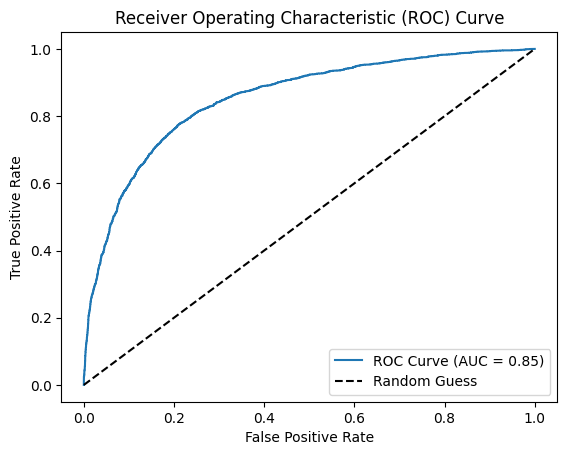

In [ ]:
# calcluate ROC

# Obtain the predicted probabilities for the positive class
y_prob = model1.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score_model1 = roc_auc_score(y_test, y_prob)
print("AUC Score", auc_score_model1)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc_score_model1))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.savefig("logistic_roc_curve.png")

plt.show()

**Logistic Regression Observations**

- An accuracy of 0.782 means that the model is correctly predicting the seasonal vaccine outcome for around 78% of the instances in the test data.
- A recall of 0.739 indicates that the model is able to correctly identify around 74% of the positive instances (those with a seasonal vaccine) in the test data.
- A precision of 0.774 implies that around 77% of the instances predicted as positive by the model are actually true positives.
- The F1 score combines both precision and recall into a single metric. With an F1 score of 0.756, it suggests a balanced performance between precision and recall.
Overall, achieving consistent scores of approximately 0.7 across these metrics is a good indication that the logistic regression model is providing reasonably accurate predictions on the test data.

The **ROC curve** above shows a AUC score of 0.852, revealing that the model is quite good on distinguishing between those who received the seasonal vaccine or not (positives and negatives).
- The score is close to 1, meaning that the predictive power of the  model can be trusted.

## **Model 2 - Decision Trees**

CR               precision    recall  f1-score   support

           0       0.75      0.83      0.79      4342
           1       0.77      0.67      0.72      3671

    accuracy                           0.76      8013
   macro avg       0.76      0.75      0.75      8013
weighted avg       0.76      0.76      0.76      8013



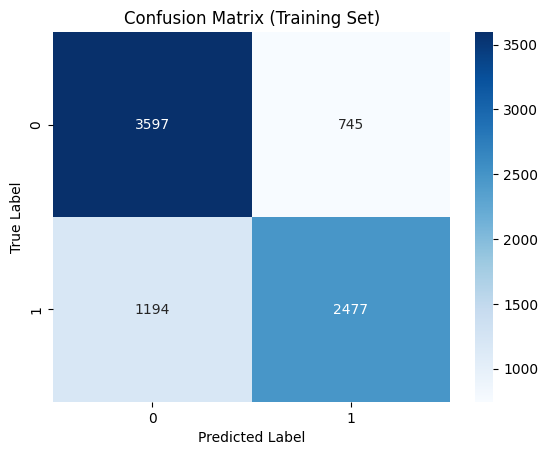

In [ ]:
# Test set predictions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# instantiate
model2 = DecisionTreeClassifier(criterion="gini", max_depth=5)

# fit the model on train data
model2.fit(X_train_scaled, y_train)

y_pred = model2.predict(X_test_scaled)

# Confusion matrix and classification report
print("CR", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Set)")

plt.savefig("decision_trees_cm.png")


In [ ]:
#evaluation of model

# Replace None with appropriate code
y_pred = model2.predict(X_test_scaled)
model2_accuracy = accuracy_score(y_test, y_pred)
model2_recall = recall_score(y_test, y_pred)
model2_precision = precision_score(y_test, y_pred)
model2_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model: {model2_accuracy:1.3f}
Recall Fitted Model: {model2_recall:1.3f}
Precision Fitted Model: {model2_precision:1.3f}
F1 Score Fitted Model: {model2_f1:1.3f}
""")



Accuracy Fitted Model: 0.758
Recall Fitted Model: 0.675
Precision Fitted Model: 0.769
F1 Score Fitted Model: 0.719



AUC Score 0.8264301813572109


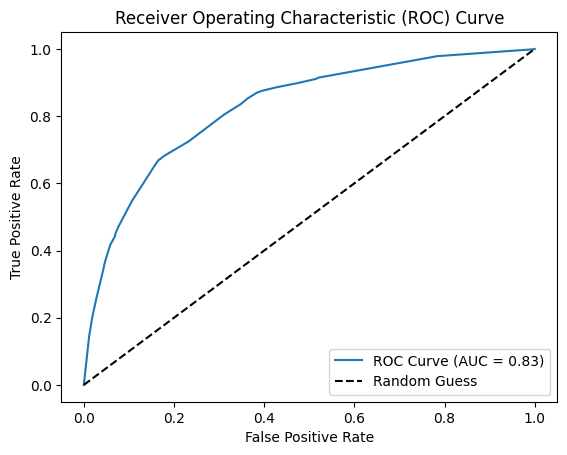

In [ ]:
# ROC and AUC
# calcluate ROC

# Obtain the predicted probabilities for the positive class
y_prob = model2.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score_model2 = roc_auc_score(y_test, y_prob)
print("AUC Score", auc_score_model2)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc_score_model2))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.savefig("decision_trees_roc_curve.png")

plt.show()

**Decision Trees Observations**
- **Accuracy**: overall, accracy stands at approximately 0.76, indicating that around 76% of instances are correctly predicted.
- **Recall** (Sensitivity/True Positive Rate) for class 0 is approximately 0.83, and for class 1, it is approximately 0.67.
- **Precision** is approximately 0.75, and for class 1, it is approximately 0.77.
- **F1-Score** for class 0 is approximately 0.79, and for class 1, it is approximately 0.72.

As per the **ROC curve**, this model has AUC of 0.826, which is slightly lower than the Logistic Regression model. It is still a commendable performance of predicting positives as positives and negatives as negatives.

## **Model 3 - Random Forest**

AUC Score 0.8538579233628797


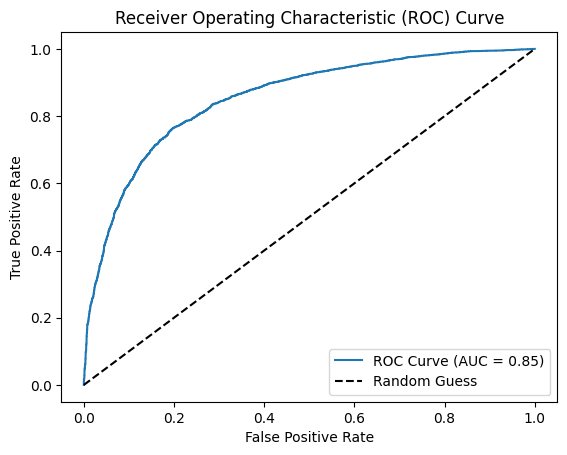

In [ ]:
# Perform feature engineering or transformation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# instantiate
model3 = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using grid search
param_grid = {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10]}
grid_search = GridSearchCV(model3, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Fit the best model on the scaled data
best_model.fit(X_train_scaled, y_train)

# Obtain predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score_model3 = roc_auc_score(y_test, y_prob)
print("AUC Score", auc_score_model3)

# Plot the ROC curve
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc_score_model3))
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

plt.savefig("random_forest_roc_curve.png")

plt.show()

In [ ]:
#evaluation of model

# Replace None with appropriate code
y_pred = best_model.predict(X_test_scaled)
model3_accuracy = accuracy_score(y_test, y_pred)
model3_recall = recall_score(y_test, y_pred)
model3_precision = precision_score(y_test, y_pred)
model3_f1 = f1_score(y_test, y_pred)

print(f"""
Accuracy Fitted Model: {model3_accuracy:1.3f}
Recall Fitted Model: {model3_recall:1.3f}
Precision Fitted Model: {model3_precision:1.3f}
F1 Score Fitted Model: {model3_f1:1.3f}
""")


Accuracy Fitted Model: 0.784
Recall Fitted Model: 0.729
Precision Fitted Model: 0.783
F1 Score Fitted Model: 0.755



**Random Forest Observations**
- **Accuracy**: the model correctly classified 78.4% of the instances.
- **Recall**: 72.9% of actual positives were correctly identified.  
- **Precision**: 78.3% of those predicted to have taken the vaccine actually took the vaccine.
- **F1-Score**: at 75.5%, it is a good balance between precision and recall.

This model's **ROC curve** shows AUC of 0.854, the highest so far. The model is more effective in predicting the seasonal vaccine uptake based on the provided features.

## **4. XGBoost**

In [ ]:
# import library
from xgboost import XGBClassifier

# Instantiate XGBClassifier
model4 = XGBClassifier()

# Fit XGBClassifier
model4.fit(X_train_scaled, y_train)

# Predict on training and test sets
training_preds = model4.predict(X_train_scaled)
test_preds = model4.predict(X_test_scaled)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(test_accuracy * 100))
print()

# evaluation
# Calculating precision, recall, and F1-score for the validation set
model4_precision = precision_score(y_test, test_preds)
model4_recall = recall_score(y_test, test_preds)
model4_f1 = f1_score(y_test, test_preds)

print("Precision: {:.4f}".format(model4_precision))
print("Recall: {:.4f}".format(model4_recall))
print("F1-Score: {:.4f}".format(model4_f1))

Training Accuracy: 87.55%
Validation accuracy: 76.97%

Precision: 0.7532
Recall: 0.7399
F1-Score: 0.7465


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Instantiate model
xgb_model = XGBClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Hyperparameters:", best_params)
print("Test Accuracy: {:.4f}".format(accuracy))
print("Test Precision: {:.4f}".format(precision))
print("Test Recall: {:.4f}".format(recall))
print("Test F1-Score: {:.4f}".format(f1))


KeyboardInterrupt: ignored

**XGBoost Classifier Observations**
- So far, this model has performed the best. It is highly likely that the algorithm has lived up to its performance characteristics of capturing complex patterns in data to provide high and improved accuracy. The results are as follows:
  - Training Accuracy of 87.55% suggests that this model was able to classify approcximately 87.55% of the instances in the training data.
  - Validation Accuracy of 76.97%  suggests that this model was able to classify approcximately 76.97% of the instances in the test data.

Accuracy: the model correctly classified 78.4% of the instances.
Recall: 72.9% of actual positives were correctly identified.
Precision: t78.3% of those predicted to have taken the vaccine actually took the vaccine.
F1-Score: at 75.5%, it is a good balance between precision and recall.

## **Feature Importance**

In [ ]:
importance_scores = clf.feature_importances_

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importance_scores})

# # Set a threshold for feature importance
# threshold >= 0.0

# Select the features with importance scores above the threshold
selected_features = feature_importance_df.loc[feature_importance_df["Importance"] > threshold, "Feature"]

# Filter the training and testing data with the selected features
X_train_selected = X_train[selected_features]
X_train_selected

,doctor_recc_seasonal,opinion_seas_vacc_effective,age_group_65+ Years
respondent_id,,,
5303,1.0,5.0,1.0
2703,0.0,2.0,0.0
6586,0.0,5.0,0.0
22563,0.0,5.0,0.0
2338,1.0,5.0,1.0
...,...,...,...
21575,0.0,4.0,0.0
5390,0.0,4.0,0.0
860,0.0,4.0,0.0


In [ ]:
selected_features

7            doctor_recc_seasonal
12    opinion_seas_vacc_effective
21            age_group_65+ Years
Name: Feature, dtype: object

In [ ]:
sorted_features = feature_importance_df.sort_values("Importance", ascending=False)
top_10_features = sorted_features.iloc[:10, :]
print(top_10_features["Feature"])
# sorted_features

,Feature,Importance
7,doctor_recc_seasonal,0.180638
12,opinion_seas_vacc_effective,0.112097
21,age_group_65+ Years,0.071018
13,opinion_seas_risk,0.048615
17,age_group_18 - 34 Years,0.036562
10,health_worker,0.032891
11,health_insurance,0.020066
14,opinion_seas_sick_from_vacc,0.019531
24,education_College Graduate,0.019377
37,rent_or_own_Rent,0.016569


graph feature importance
Interpretation
Summary
Conclusion
Recommendation